In [2]:
import mysql.connector

# Connect to MySQL
mydb = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Priya@#2468",
    database="amazon"
)


## Exploring Raw Data

Connecting mysql server to jupyter notebook

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


creating a dataframe from the amazon_sales table in amazon database

In [4]:

# Create a cursor object
mycursor = mydb.cursor()

# Execute your SQL query
mycursor.execute("SELECT * FROM amazon_sales")

# Fetch the results
result = mycursor.fetchall()

# Convert the results to a DataFrame
ama_sale = pd.DataFrame(result, columns=mycursor.column_names)
print(ama_sale)

      invoice_id branch       city customer_type  gender  \
0    750-67-8428      A     Yangon        Member  Female   
1    226-31-3081      C  Naypyitaw        Normal  Female   
2    631-41-3108      A     Yangon        Normal    Male   
3    123-19-1176      A     Yangon        Member    Male   
4    373-73-7910      A     Yangon        Normal    Male   
..           ...    ...        ...           ...     ...   
995  233-67-5758      C  Naypyitaw        Normal    Male   
996  303-96-2227      B   Mandalay        Normal  Female   
997  727-02-1313      A     Yangon        Member    Male   
998  347-56-2442      A     Yangon        Normal    Male   
999  849-09-3807      A     Yangon        Member  Female   

               product_line unit_price  quantity      VAT    total  \
0         Health and beauty      74.69         7  26.1415   548.97   
1    Electronic accessories      15.28         5   3.8200    80.22   
2        Home and lifestyle      46.33         7  16.2155   340.53   

In [5]:
## printing the shape of the amazon_sales table 
ama_sale.shape

(1000, 20)

In [6]:
ama_sale.columns

Index(['invoice_id', 'branch', 'city', 'customer_type', 'gender',
       'product_line', 'unit_price', 'quantity', 'VAT', 'total', 'date',
       'time', 'payment_method', 'cogs', 'gross_margin_percentage',
       'gross_income', 'Rating', 'timeofday', 'dayname', 'monthname'],
      dtype='object')

In [7]:
ama_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   invoice_id               1000 non-null   object        
 1   branch                   1000 non-null   object        
 2   city                     1000 non-null   object        
 3   customer_type            1000 non-null   object        
 4   gender                   1000 non-null   object        
 5   product_line             1000 non-null   object        
 6   unit_price               1000 non-null   object        
 7   quantity                 1000 non-null   int64         
 8   VAT                      1000 non-null   float64       
 9   total                    1000 non-null   object        
 10  date                     1000 non-null   object        
 11  time                     1000 non-null   datetime64[ns]
 12  payment_method           1000 non-n

In [8]:
ama_sale.describe()

,quantity,VAT,time,gross_margin_percentage,Rating
count,1000.000000,1000.000000,1000,1.000000e+03,1000.00000
mean,5.510000,15.379369,2024-05-15 15:24:41.880000,4.761905e+00,6.97270
min,1.000000,0.508500,2024-05-15 10:00:00,4.761905e+00,4.00000
25%,3.000000,5.924875,2024-05-15 12:43:00,4.761905e+00,5.50000
50%,5.000000,12.088000,2024-05-15 15:19:00,4.761905e+00,7.00000
75%,8.000000,22.445250,2024-05-15 18:15:00,4.761905e+00,8.50000
max,10.000000,49.650000,2024-05-15 20:59:00,4.761905e+00,10.00000
std,2.923431,11.708825,NaN,2.043833e-14,1.71858


## Product_line Analysis

In [9]:
ama_sale['product_line'].isnull().sum()
#checking the null values seems there are no null values in it 

0

In [10]:
print(ama_sale['product_line'].nunique())

6


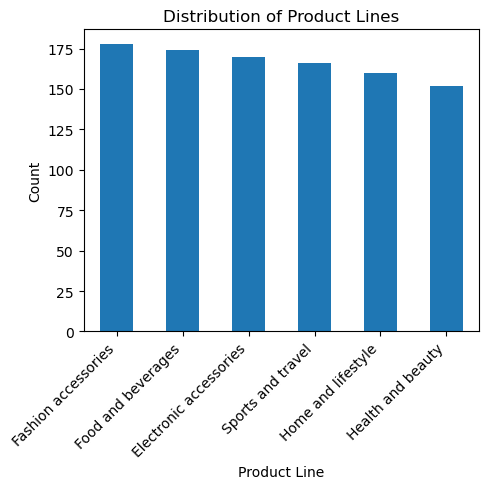

In [11]:
import matplotlib.pyplot as plt

# Count the occurrences of each product line
product_line_counts = ama_sale['product_line'].value_counts()

# Create a bar plot
plt.figure(figsize=(5, 5))
product_line_counts.plot(kind='bar')
plt.title('Distribution of Product Lines')
plt.xlabel('Product Line')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



## Sales Analysis

In [12]:
print("data in total column(nothing but total sales:\n",ama_sale['total'])
print("unique values in total:\n",ama_sale['total'].nunique())
print("idea of unique values present:\n",ama_sale['total'].unique())

data in total column(nothing but total sales:
 0       548.97
1        80.22
2       340.53
3       489.05
4       634.38
        ...   
995      42.37
996    1022.49
997      33.43
998      69.11
999     649.30
Name: total, Length: 1000, dtype: object
unique values in total:
 990
idea of unique values present:
 [Decimal('548.97') Decimal('80.22') Decimal('340.53') Decimal('489.05')
 Decimal('634.38') Decimal('627.62') Decimal('433.69') Decimal('772.38')
 Decimal('76.15') Decimal('172.75') Decimal('60.82') Decimal('107.14')
 Decimal('246.49') Decimal('453.50') Decimal('749.49') Decimal('590.44')
 Decimal('506.64') Decimal('457.44') Decimal('172.21') Decimal('84.63')
 Decimal('451.71') Decimal('277.14') Decimal('69.72') Decimal('181.44')
 Decimal('279.18') Decimal('441.76') Decimal('35.20') Decimal('184.11')
 Decimal('463.89') Decimal('235.21') Decimal('494.18') Decimal('737.76')
 Decimal('703.75') Decimal('202.82') Decimal('417.56') Decimal('71.53')
 Decimal('328.76') Decimal('575.32')

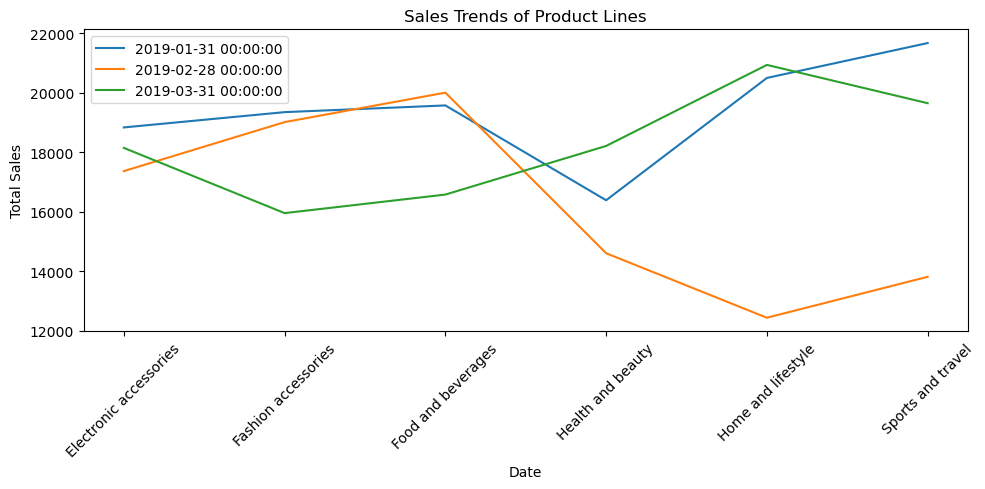

In [13]:
ama_sale['date'] = pd.to_datetime(ama_sale['date'])

# Aggregate sales data by product line and date
sales_trends = ama_sale.groupby(['product_line', pd.Grouper(key='date', freq='M')])['total'].sum().unstack()

# Visualize sales trends for each product line
plt.figure(figsize=(10, 5))
for product_line in sales_trends.columns:
    plt.plot(sales_trends.index, sales_trends[product_line], label=product_line)

plt.title('Sales Trends of Product Lines')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##  Customer Analysis

In [14]:
ama_sale['customer_type'].value_counts()

customer_type
Member    501
Normal    499
Name: count, dtype: int64

In [15]:
ama_sale['customer_type'].isnull().sum()

0

In [16]:
ama_sale['customer_type'].unique()

array(['Member', 'Normal'], dtype=object)

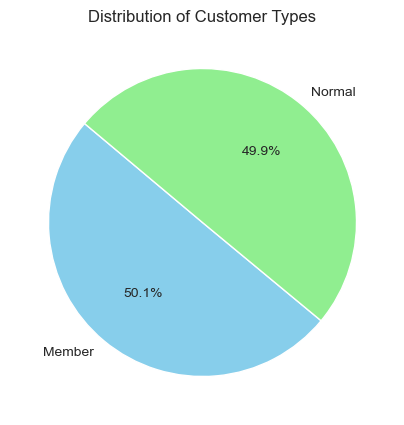

In [78]:
customer_type_counts = ama_sale['customer_type'].value_counts()

# Plotting the distribution of customer types using a pie chart
plt.figure(figsize=(5, 5))
plt.pie(customer_type_counts, labels=customer_type_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen'], startangle=140)
plt.title('Distribution of Customer Types')
plt.show()

## EDA on the Data

In [18]:

# Initialize an empty dictionary to store the results
unique_values_dict = {}

# Loop through each column in the DataFrame
for column in ama_sale.columns:
    unique_values = ama_sale[column].nunique()
    unique_values_dict[column] = unique_values

# Print the number of unique values for each column
for column, unique_values in unique_values_dict.items():
    print(f"Column '{column}' has {unique_values} unique values")

Column 'invoice_id' has 1000 unique values
Column 'branch' has 3 unique values
Column 'city' has 3 unique values
Column 'customer_type' has 2 unique values
Column 'gender' has 2 unique values
Column 'product_line' has 6 unique values
Column 'unit_price' has 943 unique values
Column 'quantity' has 10 unique values
Column 'VAT' has 990 unique values
Column 'total' has 990 unique values
Column 'date' has 89 unique values
Column 'time' has 506 unique values
Column 'payment_method' has 3 unique values
Column 'cogs' has 990 unique values
Column 'gross_margin_percentage' has 1 unique values
Column 'gross_income' has 873 unique values
Column 'Rating' has 61 unique values
Column 'timeofday' has 3 unique values
Column 'dayname' has 7 unique values
Column 'monthname' has 3 unique values


In [19]:
missing_values = ama_sale.isnull().sum()

# Print the results
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
invoice_id                 0
branch                     0
city                       0
customer_type              0
gender                     0
product_line               0
unit_price                 0
quantity                   0
VAT                        0
total                      0
date                       0
time                       0
payment_method             0
cogs                       0
gross_margin_percentage    0
gross_income               0
Rating                     0
timeofday                  0
dayname                    0
monthname                  0
dtype: int64


In [20]:

# Convert categorical columns to category data type
categorical_columns = [
    'invoice_id', 'branch', 'city', 'customer_type', 'gender', 
    'product_line', 'payment_method', 'timeofday', 'dayname', 'monthname'
]

for column in categorical_columns:
    ama_sale[column] = ama_sale[column].astype('category')

# Convert numerical columns to appropriate numeric data types
numerical_columns = ['quantity', 'VAT', 'gross_margin_percentage', 'Rating', 'unit_price', 'total', 'cogs', 'gross_income']

for column in numerical_columns:
    ama_sale[column] = pd.to_numeric(ama_sale[column], errors='coerce')

# Convert temporal columns to datetime data type
temporal_columns = ['date', 'time']

ama_sale['date'] = pd.to_datetime(ama_sale['date'], errors='coerce')
ama_sale['time'] = pd.to_datetime(ama_sale['time'], format='%H:%M:%S', errors='coerce')

# Check the data types after conversion
print(ama_sale.dtypes)

invoice_id                       category
branch                           category
city                             category
customer_type                    category
gender                           category
product_line                     category
unit_price                        float64
quantity                            int64
VAT                               float64
total                             float64
date                       datetime64[ns]
time                       datetime64[ns]
payment_method                   category
cogs                              float64
gross_margin_percentage           float64
gross_income                      float64
Rating                            float64
timeofday                        category
dayname                          category
monthname                        category
dtype: object


In [21]:

categorical_columns = []
numerical_columns = []
temporal_columns = []

# Loop through each column in the DataFrame
for column in ama_sale.columns:
    if pd.api.types.is_numeric_dtype(ama_sale[column]):
        numerical_columns.append(column)
    elif pd.api.types.is_datetime64_any_dtype(ama_sale[column]) or pd.api.types.is_timedelta64_dtype(ama_sale[column]):
        temporal_columns.append(column)
    else:
        categorical_columns.append(column)

# Print the results
print("Categorical Columns:")
print(categorical_columns)
print("\nNumerical Columns:")
print(numerical_columns)
print("\nTemporal Columns:")
print(temporal_columns)

Categorical Columns:
['invoice_id', 'branch', 'city', 'customer_type', 'gender', 'product_line', 'payment_method', 'timeofday', 'dayname', 'monthname']

Numerical Columns:
['unit_price', 'quantity', 'VAT', 'total', 'cogs', 'gross_margin_percentage', 'gross_income', 'Rating']

Temporal Columns:
['date', 'time']


## Insights and Questions

#### Questions 1:What is the count of distinct cities in the dataset?

In [22]:
distinct_cities_count = ama_sale['city'].nunique()
print("Count of distinct cities in the dataset:", distinct_cities_count)

Count of distinct cities in the dataset: 3


##### Visualization for Question 1

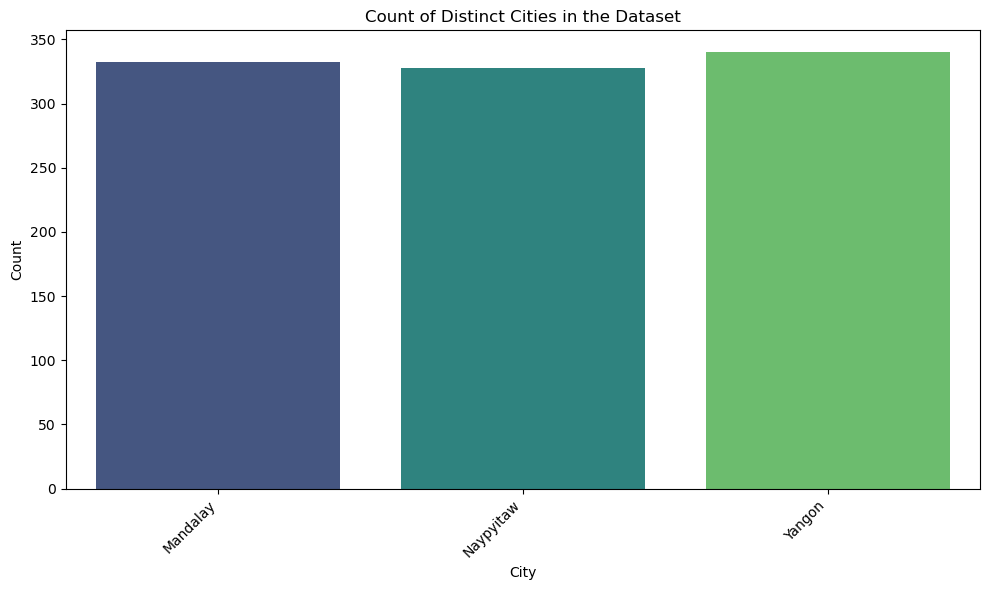

In [23]:
# Count of distinct cities
distinct_cities_count = ama_sale['city'].nunique()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.countplot(x='city', data=ama_sale, palette='viridis')
plt.title('Count of Distinct Cities in the Dataset')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()


#### Question2: For each branch, what is the corresponding city?

In [24]:

branch_city_mapping = ama_sale.groupby('branch')['city'].unique().apply(lambda x: ', '.join(x)).reset_index()
print(branch_city_mapping)


  branch       city
0      A     Yangon
1      B   Mandalay
2      C  Naypyitaw


##### Visualization for Question 2

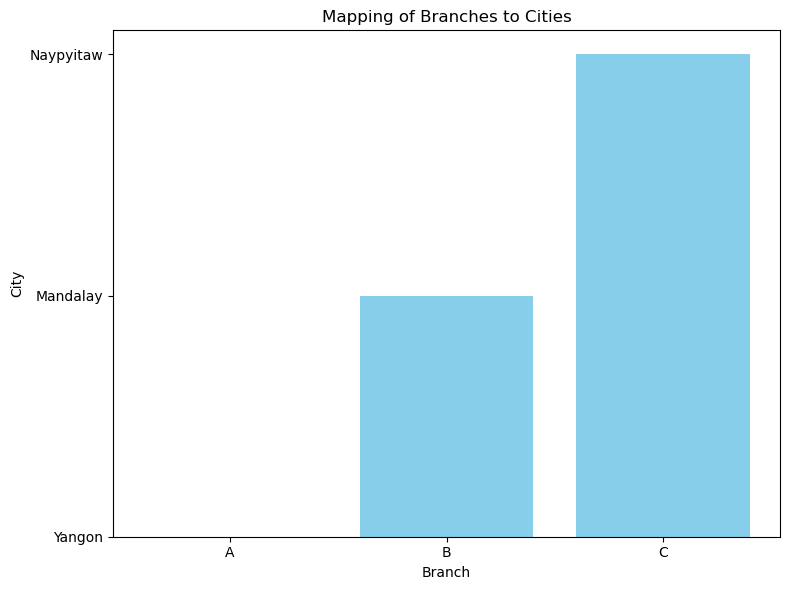

In [25]:
branch_city_mapping = {
    'branch': ['A', 'B', 'C'],
    'city': ['Yangon', 'Mandalay', 'Naypyitaw']
}

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(branch_city_mapping['branch'], branch_city_mapping['city'], color='skyblue')
plt.title('Mapping of Branches to Cities')
plt.xlabel('Branch')
plt.ylabel('City')
plt.xticks(rotation=0)  # Rotating x-axis labels if necessary
plt.tight_layout()
plt.show()

#### Question3:What is the count of distinct product lines in the dataset?

In [26]:
distinct_product_lines_count = ama_sale['product_line'].nunique()
print("Count of distinct product lines in the dataset:", distinct_product_lines_count)

Count of distinct product lines in the dataset: 6


#### Question4:Which payment method occurs most frequently?

In [27]:
most_frequent_payment_method = ama_sale['payment_method'].mode()[0]
print("The payment method that occurs most frequently:", most_frequent_payment_method)


The payment method that occurs most frequently: Ewallet


##### Visualization for Question4:

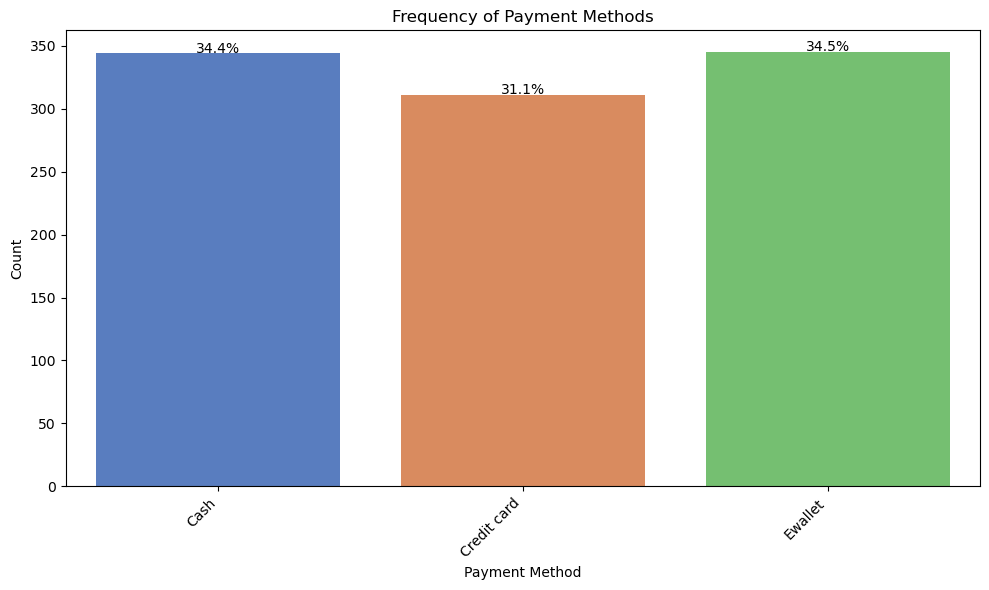

In [28]:
# Find the most frequent payment method
most_frequent_payment_method = ama_sale['payment_method'].mode()[0]

# Count occurrences of each payment method
payment_method_counts = ama_sale['payment_method'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='payment_method', data=ama_sale, palette='muted')

# Annotate each bar with the count or percentage
total = len(ama_sale['payment_method'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.5,
            '{:.1f}%'.format(100 * height / total), ha="center")

plt.title('Frequency of Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()


#### Question5:Which product line has the highest sales?

In [29]:
# Calculate total sales for each product line
product_line_sales = ama_sale.groupby('product_line')['total'].sum()

# Find the product line with the highest sales
highest_sales_product_line = product_line_sales.idxmax()
total_sales_highest_product_line = product_line_sales.max()

print("Product line with the highest sales:", highest_sales_product_line)
print("Total sales for the highest selling product line:", total_sales_highest_product_line)


Product line with the highest sales: Food and beverages
Total sales for the highest selling product line: 56144.96


##### Visualization for Question 5 :

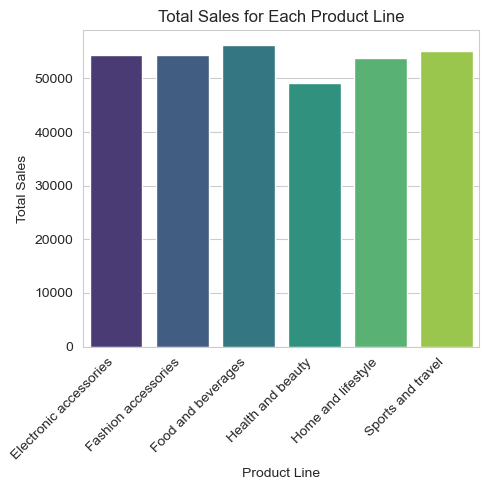

In [82]:
# Create a bar plot
plt.figure(figsize=(5, 5))
sns.barplot(x=product_line_sales.index, y=product_line_sales.values, palette='viridis')
plt.title('Total Sales for Each Product Line')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

#### Question6:How much revenue is generated each month?

In [31]:
ama_sale['monthname'].unique()

['Jan', 'Mar', 'Feb']
Categories (3, object): ['Feb', 'Jan', 'Mar']

In [32]:
# Group by 'monthname' and calculate the total revenue for each month
monthly_revenue = ama_sale.groupby('monthname')['total'].sum().reset_index()

# Sort the result by total revenue in descending order
monthly_revenue = monthly_revenue.sort_values(by='total', ascending=False)

print("Revenue generated each month (ordered by total revenue):")
print(monthly_revenue)

Revenue generated each month (ordered by total revenue):
  monthname      total
1       Jan  116292.11
2       Mar  109455.74
0       Feb   97219.58


#### Visualization of Question6:

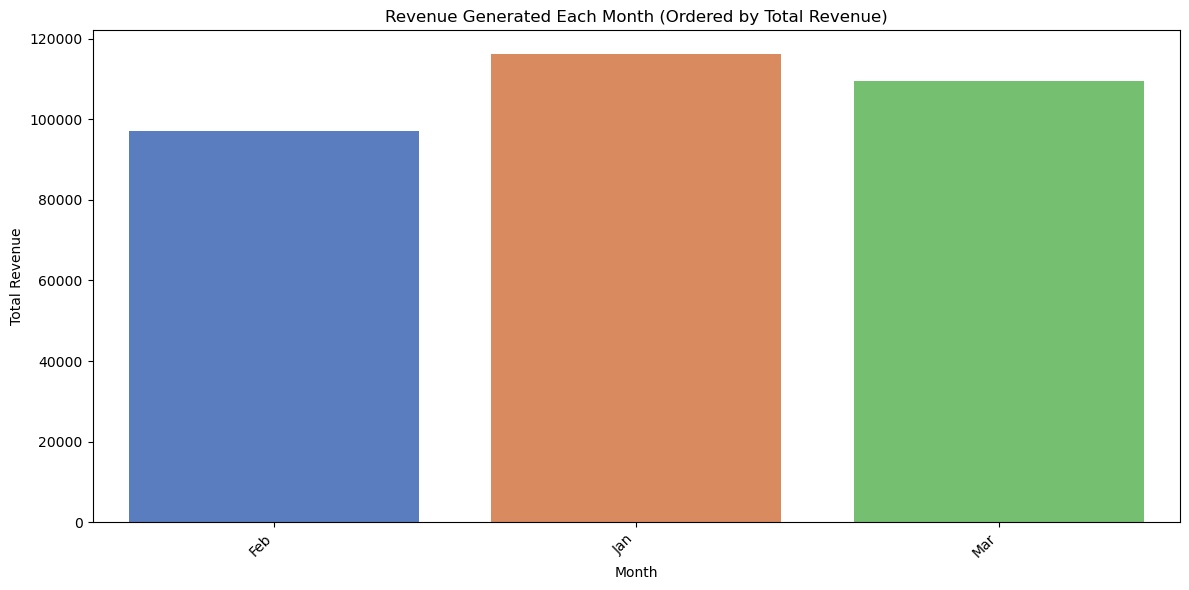

In [33]:
# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='monthname', y='total', data=monthly_revenue, palette='muted')
plt.title('Revenue Generated Each Month (Ordered by Total Revenue)')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

#### Question7:In which month did the cost of goods sold reach its peak?

In [34]:
# Group by 'monthname' and calculate the total COGS for each month
monthly_cogs = ama_sale.groupby('monthname')['cogs'].sum().reset_index()

# Find the month with the maximum COGS
peak_cogs_month = monthly_cogs.loc[monthly_cogs['cogs'].idxmax()]

print("Month in which the cost of goods sold reached its peak:")
print(peak_cogs_month)

Month in which the cost of goods sold reached its peak:
monthname          Jan
cogs         110754.16
Name: 1, dtype: object


#### Visualization for Question7:

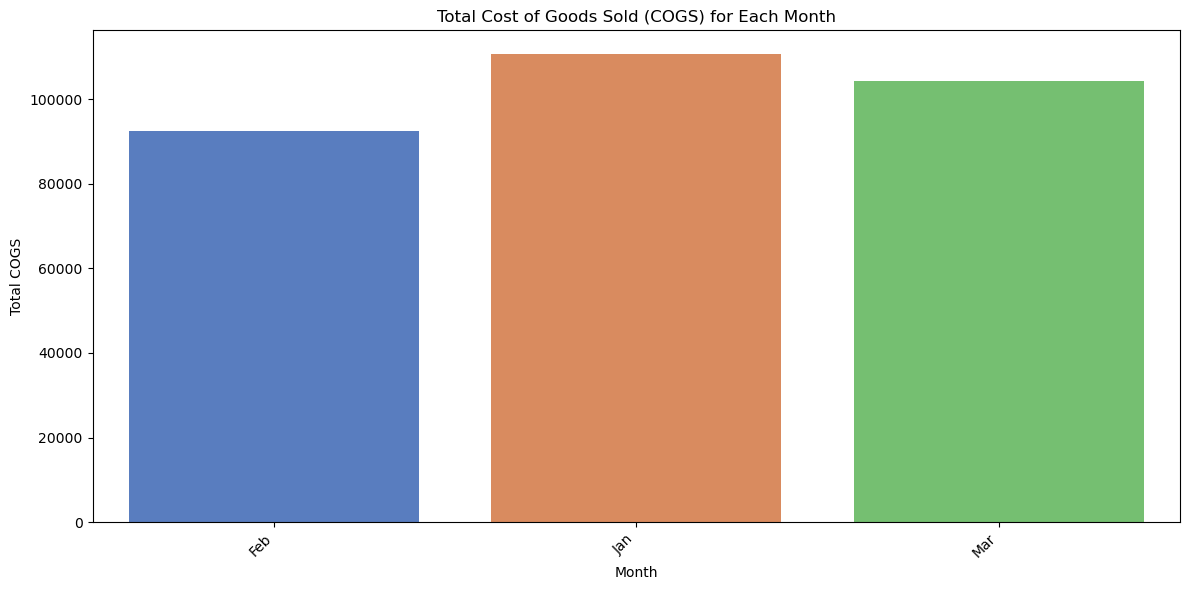

In [35]:
# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='monthname', y='cogs', data=monthly_cogs, palette='muted')
plt.title('Total Cost of Goods Sold (COGS) for Each Month')
plt.xlabel('Month')
plt.ylabel('Total COGS')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()


#### Question8:Which product line generated the highest revenue?


In [36]:
product_line_revenue = ama_sale.groupby('product_line')['total'].sum().reset_index()

# Find the product line with the highest revenue
highest_revenue_product_line = product_line_revenue.loc[product_line_revenue['total'].idxmax()]

print("Product line that generated the highest revenue:")
print(highest_revenue_product_line)

Product line that generated the highest revenue:
product_line    Food and beverages
total                     56144.96
Name: 2, dtype: object


#### Visualization for Question8:

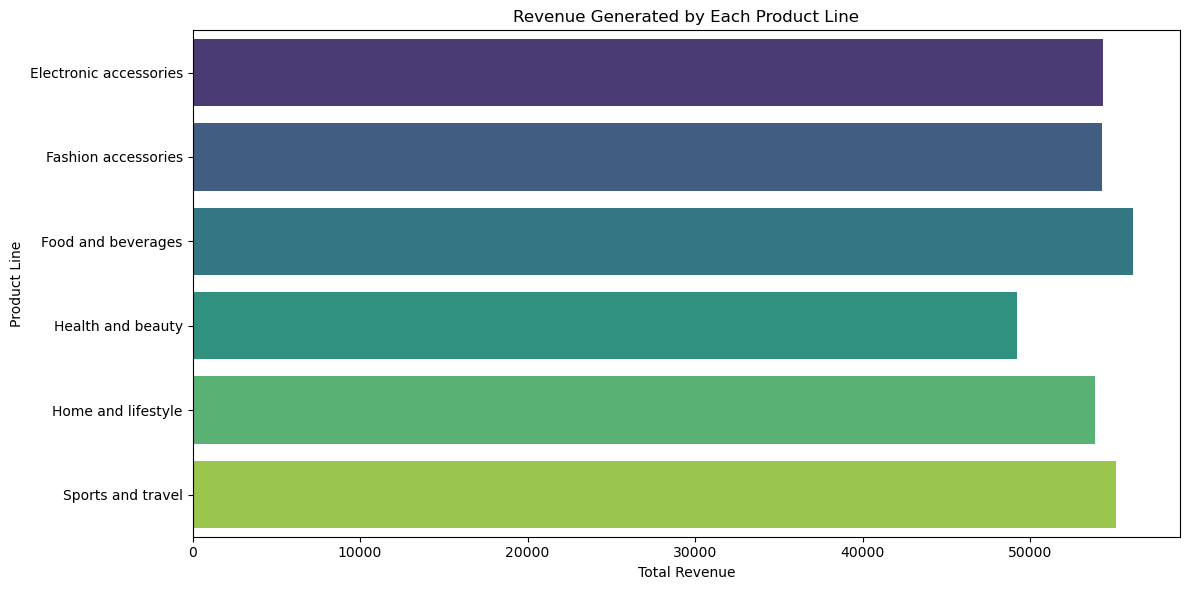

In [37]:

# Sort product lines by total revenue in descending order
product_line_revenue_sorted = product_line_revenue.sort_values(by='total', ascending=True)

# Create a custom color palette
custom_palette = sns.color_palette("viridis", len(product_line_revenue_sorted))

# Create a horizontal bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='total', y='product_line', data=product_line_revenue_sorted, palette=custom_palette)
plt.title('Revenue Generated by Each Product Line')
plt.xlabel('Total Revenue')
plt.ylabel('Product Line')
plt.tight_layout()
plt.show()

#### Question9:In which city was the highest revenue recorded?

In [38]:
# Group by 'city' and calculate the total revenue for each city
city_revenue = ama_sale.groupby('city')['total'].sum().reset_index()

# Find the city with the highest revenue
highest_revenue_city = city_revenue.loc[city_revenue['total'].idxmax()]

print("City with the highest revenue recorded:")
print(highest_revenue_city)

City with the highest revenue recorded:
city     Naypyitaw
total    110568.86
Name: 1, dtype: object


##### Visualization for Question9:

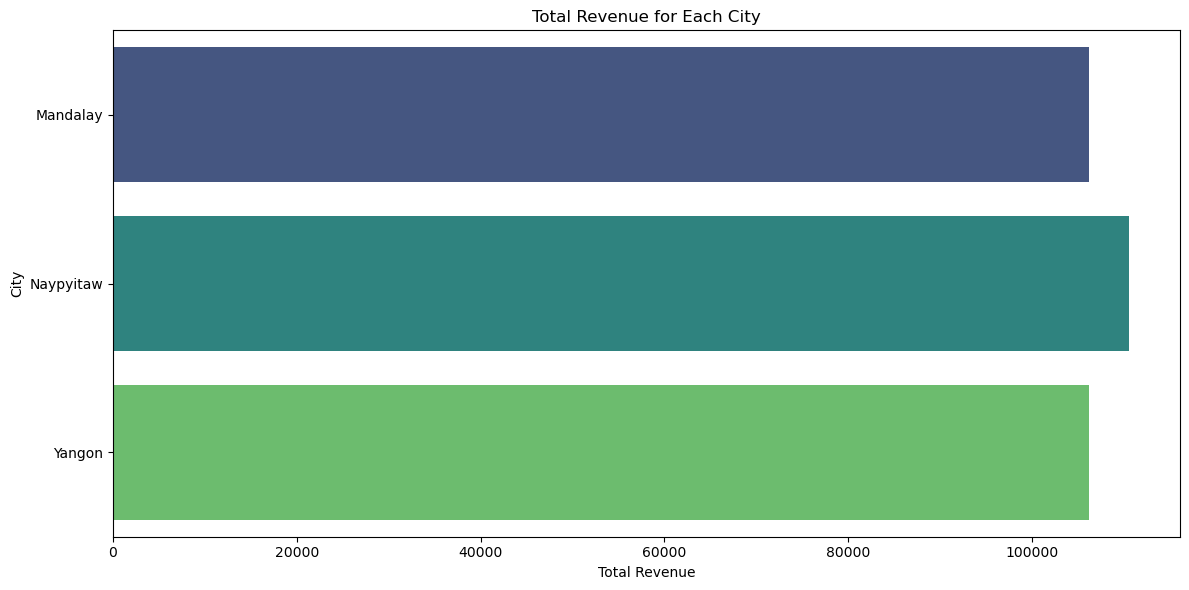

City with the highest revenue recorded:
city     Naypyitaw
total    110568.86
Name: 1, dtype: object


In [39]:
# Sort cities by total revenue in descending order
city_revenue_sorted = city_revenue.sort_values(by='total', ascending=False)

# Create a horizontal bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='total', y='city', data=city_revenue_sorted, palette='viridis')
plt.title('Total Revenue for Each City')
plt.xlabel('Total Revenue')
plt.ylabel('City')
plt.tight_layout()
plt.show()

# Print the city with the highest revenue
print("City with the highest revenue recorded:")
print(highest_revenue_city)

#### Question10:Which product line incurred the highest Value Added Tax?

In [40]:
# Group by 'product_line' and calculate the total VAT for each product line
product_line_vat = ama_sale.groupby('product_line')['VAT'].sum().reset_index()

# Find the product line with the highest VAT
highest_vat_product_line = product_line_vat.loc[product_line_vat['VAT'].idxmax()]

print("Product line that incurred the highest Value Added Tax (VAT):")
print(highest_vat_product_line)

Product line that incurred the highest Value Added Tax (VAT):
product_line    Food and beverages
VAT                       2673.564
Name: 2, dtype: object


#### Visualization for Question 10:

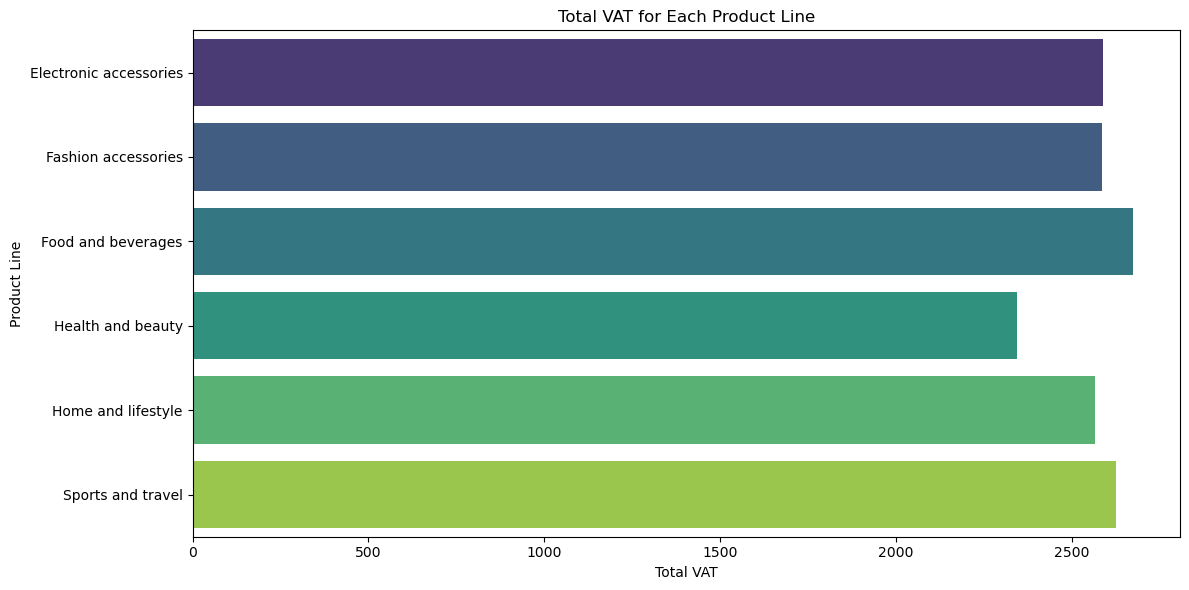

In [41]:

# Sort product lines by total VAT in descending order
product_line_vat_sorted = product_line_vat.sort_values(by='VAT', ascending=False)

# Create a horizontal bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='VAT', y='product_line', data=product_line_vat_sorted, palette='viridis')
plt.title('Total VAT for Each Product Line')
plt.xlabel('Total VAT')
plt.ylabel('Product Line')
plt.tight_layout()
plt.show()

#### Question11:For each product line, add a column indicating "Good" if its sales are above average, otherwise "Bad.

In [42]:
# Calculate the average sales
average_sales = ama_sale['total'].mean()

# Add a new column indicating whether sales are above or below average
ama_sale['sales_category'] = ['Good' if total > average_sales else 'Bad' for total in ama_sale['total']]

# Display the DataFrame with the new column
ama_sale['sales_category'].unique()

array(['Good', 'Bad'], dtype=object)

#### Visualization for Question 11:

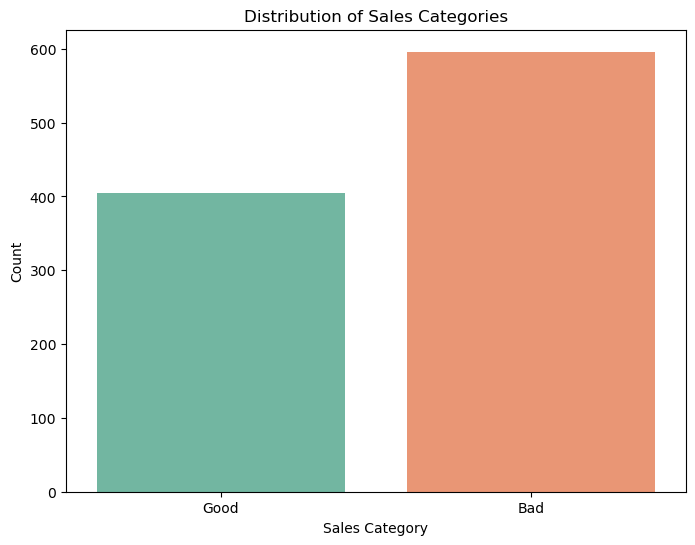

In [43]:
# Create a countplot to visualize the distribution of sales categories
plt.figure(figsize=(8, 6))
sns.countplot(x='sales_category', data=ama_sale, palette='Set2')
plt.title('Distribution of Sales Categories')
plt.xlabel('Sales Category')
plt.ylabel('Count')
plt.show()

#### Question12:Identify the branch that exceeded the average number of products sold.

In [44]:
# Calculate the average number of products sold
average_quantity = ama_sale['quantity'].mean()

# Identify branches that exceeded the average number of products sold
branches_exceeding_average = ama_sale.groupby('branch').filter(lambda x: x['quantity'].mean() > average_quantity)['branch'].unique()

print("Branches that exceeded the average number of products sold:", branches_exceeding_average)

Branches that exceeded the average number of products sold: ['C']
Categories (3, object): ['A', 'B', 'C']


#### Visualization for Question 12:

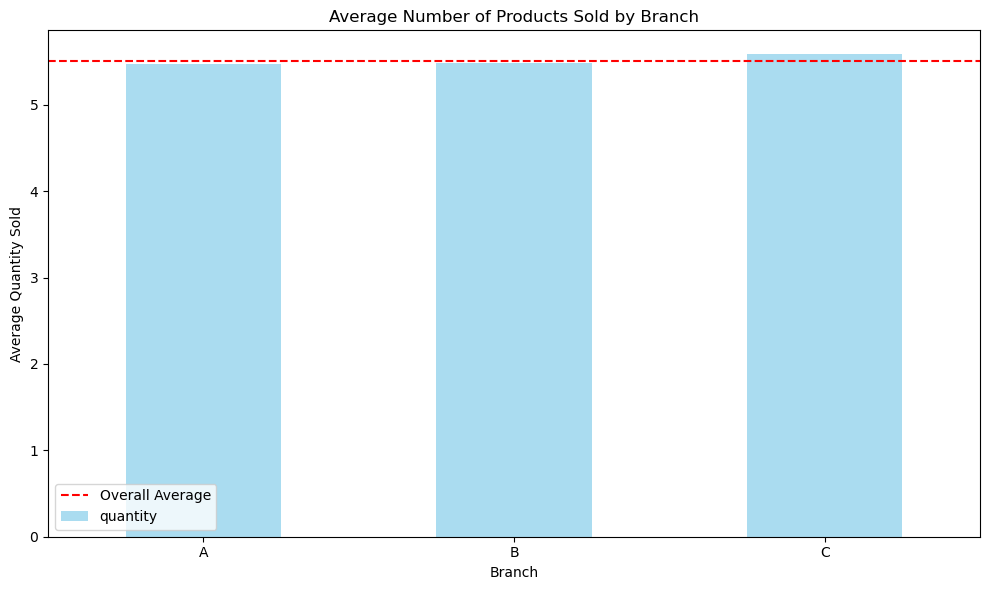

In [45]:
# Calculate the average number of products sold
average_quantity = ama_sale['quantity'].mean()

# Calculate the average number of products sold for each branch
branch_avg_quantity = ama_sale.groupby('branch')['quantity'].mean()

# Plot the average number of products sold for each branch
plt.figure(figsize=(10, 6))
branch_avg_quantity.plot(kind='bar', color='skyblue', alpha=0.7)
plt.axhline(y=average_quantity, color='red', linestyle='--', label='Overall Average')
plt.title('Average Number of Products Sold by Branch')
plt.xlabel('Branch')
plt.ylabel('Average Quantity Sold')
plt.legend()
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### Question13:Which product line is most frequently associated with each gender?

In [46]:

# Group by 'gender' and 'product_line', count occurrences, and reset index
gender_product_line_counts = ama_sale.groupby(['gender', 'product_line']).size().reset_index(name='count')

# Get the index of the maximum count for each gender
max_counts = gender_product_line_counts.groupby('gender')['count'].idxmax()

# Extract the product lines with the maximum counts for each gender
most_frequent_product_lines = gender_product_line_counts.loc[max_counts]

print("Product lines most frequently associated with each gender:")
print(most_frequent_product_lines)

Product lines most frequently associated with each gender:
   gender         product_line  count
1  Female  Fashion accessories     96
9    Male    Health and beauty     88


#### Visualization for Question13:

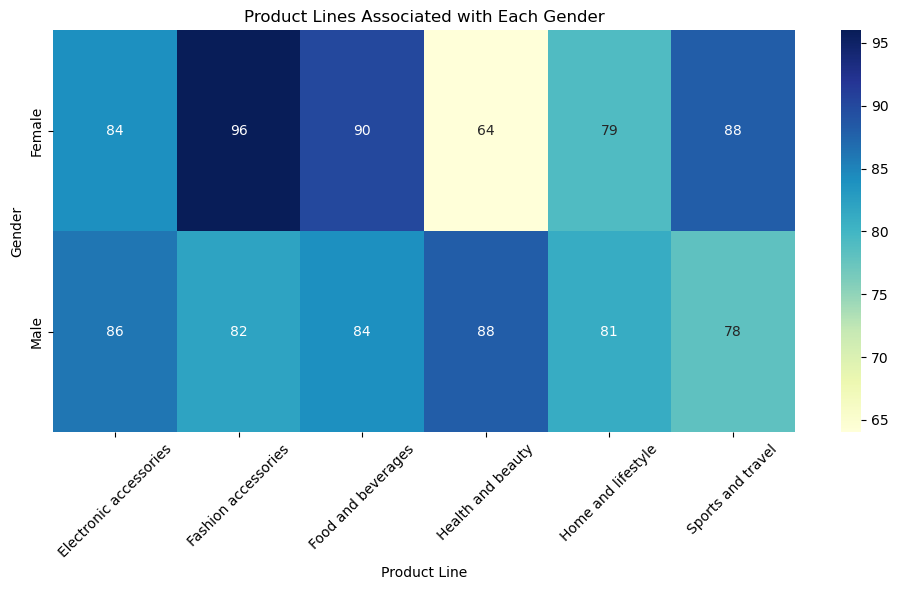

In [47]:
# Pivot the data to prepare for heatmap
pivot_table = gender_product_line_counts.pivot(index='gender', columns='product_line', values='count')

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='g')
plt.title('Product Lines Associated with Each Gender')
plt.xlabel('Product Line')
plt.ylabel('Gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Question14:Calculate the average rating for each product line.

In [48]:
# Calculate the average rating for each product line
average_rating_per_product_line = ama_sale.groupby('product_line')['Rating'].mean().reset_index()

print("Average rating for each product line:")
print(average_rating_per_product_line)

Average rating for each product line:
             product_line    Rating
0  Electronic accessories  6.924706
1     Fashion accessories  7.029213
2      Food and beverages  7.113218
3       Health and beauty  7.003289
4      Home and lifestyle  6.837500
5       Sports and travel  6.916265


#### Visualization for Question14:

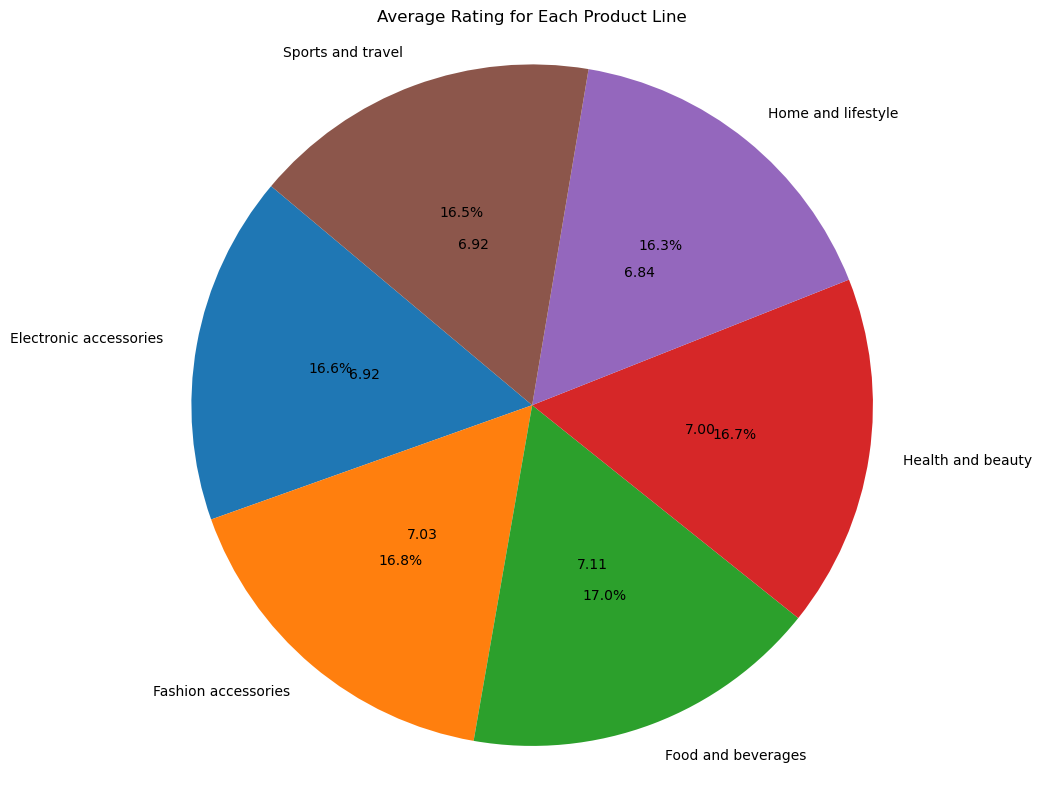

In [49]:
# Create a pie chart
plt.figure(figsize=(10, 8))
pie = plt.pie(average_rating_per_product_line['Rating'], labels=average_rating_per_product_line['product_line'], autopct='%1.1f%%', startangle=140)
plt.title('Average Rating for Each Product Line')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()

# Add annotations with the ratings
for i, rating in enumerate(average_rating_per_product_line['Rating']):
    angle = (pie[0][i].theta2 + pie[0][i].theta1) / 2
    x = pie[0][i].r * 0.5 * np.cos(np.deg2rad(angle))  # Adjust the radius for positioning
    y = pie[0][i].r * 0.5 * np.sin(np.deg2rad(angle))  # Adjust the radius for positioning
    plt.text(x, y, f'{rating:.2f}', ha='center', va='center')

plt.show()


#### Question15:Count the sales occurrences for each time of day on every weekday.

In [50]:
# Group by 'dayname' and 'timeofday', count occurrences, and reset index
sales_occurrences = ama_sale.groupby(['dayname', 'timeofday']).size().reset_index(name='count')

# Assuming sales_occurrences is your DataFrame containing the sales occurrences
sales_occurrences_sorted = sales_occurrences.sort_values(by='count', ascending=False)

print("Sales occurrences for each time of day on every weekday (ordered by count):")
print(sales_occurrences_sorted)

Sales occurrences for each time of day on every weekday (ordered by count):
   dayname  timeofday  count
18     Wed  Afternoon     71
6      Sat  Afternoon     69
0      Fri  Afternoon     68
7      Sat    Evening     67
3      Mon  Afternoon     64
15     Tue  Afternoon     62
12     Thu  Afternoon     61
16     Tue    Evening     60
9      Sun  Afternoon     59
10     Sun    Evening     52
19     Wed    Evening     50
13     Thu    Evening     44
1      Fri    Evening     42
4      Mon    Evening     40
17     Tue    Morning     36
14     Thu    Morning     33
2      Fri    Morning     29
8      Sat    Morning     28
11     Sun    Morning     22
20     Wed    Morning     22
5      Mon    Morning     21


#### Visualization for Question15:

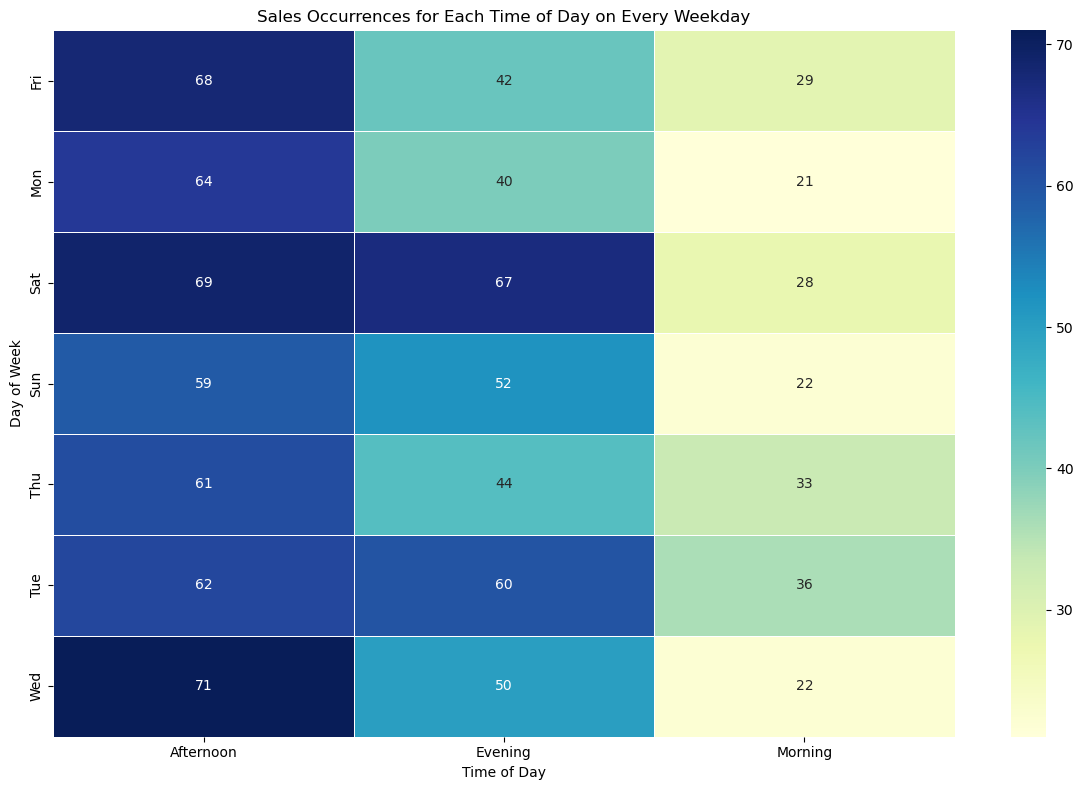

In [51]:
# Pivot the data to prepare for heatmap
pivot_table = sales_occurrences_sorted.pivot(index='dayname', columns='timeofday', values='count')

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='g', linewidths=0.5)
plt.title('Sales Occurrences for Each Time of Day on Every Weekday')
plt.xlabel('Time of Day')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()

#### Question16:Identify the customer type contributing the highest revenue

In [52]:
# Group by 'customer_type' and calculate the total revenue for each customer type
customer_type_revenue = ama_sale.groupby('customer_type')['total'].sum().reset_index()

# Find the customer type with the highest revenue
highest_revenue_customer_type = customer_type_revenue.loc[customer_type_revenue['total'].idxmax()]

print("Customer type contributing the highest revenue:")
print(highest_revenue_customer_type)

Customer type contributing the highest revenue:
customer_type       Member
total            164223.81
Name: 0, dtype: object


#### Visualization for Question16:

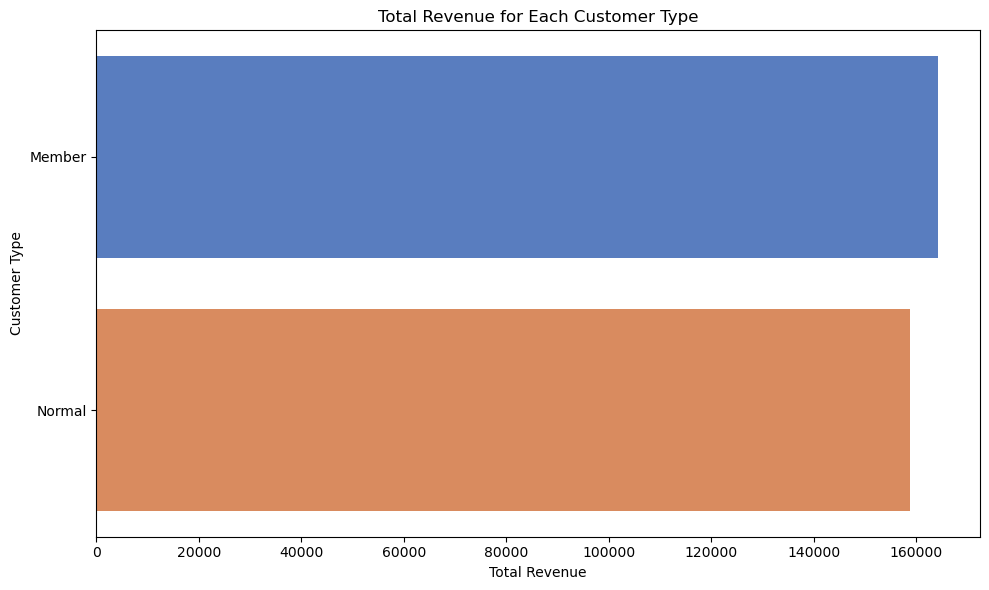

In [53]:
# Sort customer types by total revenue in descending order
customer_type_revenue_sorted = customer_type_revenue.sort_values(by='total', ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='total', y='customer_type', data=customer_type_revenue_sorted, palette='muted')
plt.title('Total Revenue for Each Customer Type')
plt.xlabel('Total Revenue')
plt.ylabel('Customer Type')
plt.tight_layout()
plt.show()

#### Question17:Determine the city with the highest VAT percentage.

In [54]:

# Group by 'city' and calculate the total VAT and total sales (excluding VAT)
city_vat_sales = ama_sale.groupby('city').agg({'VAT': 'sum', 'total': 'sum'}).reset_index()

# Calculate the VAT percentage for each city
city_vat_sales['vat_percentage'] = (city_vat_sales['VAT'] / city_vat_sales['total']) * 100

# Find the city with the highest VAT percentage
city_highest_vat_percentage = city_vat_sales.loc[city_vat_sales['vat_percentage'].idxmax()]

print("City with the highest VAT percentage:")
print(city_highest_vat_percentage['city'], "-", city_highest_vat_percentage['vat_percentage'], "%")

City with the highest VAT percentage:
Naypyitaw - 4.761898151070744 %


##### Visualization for Question17:

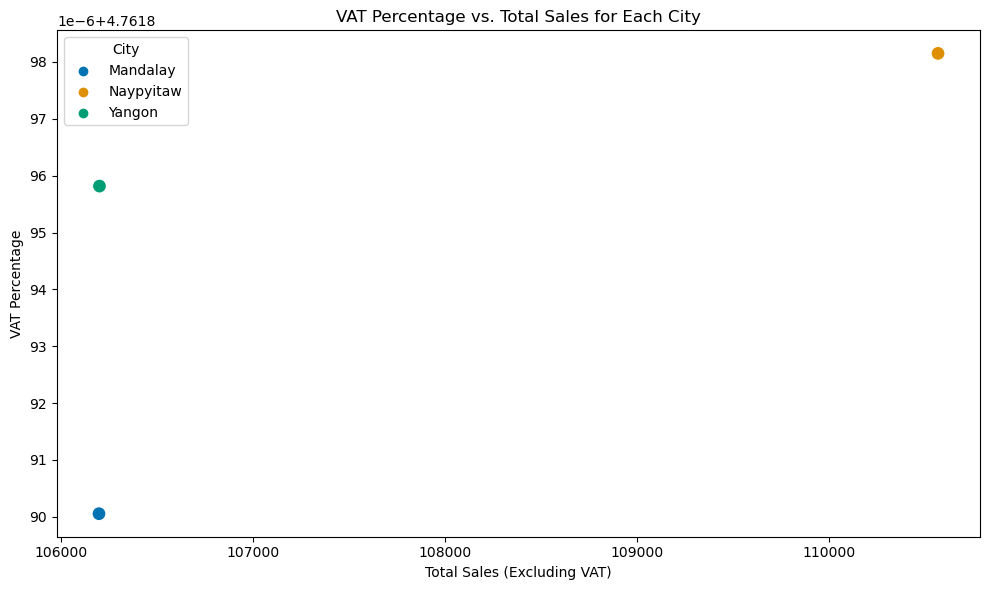

In [55]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total', y='vat_percentage', data=city_vat_sales, hue='city', palette='colorblind', s=100)
plt.title('VAT Percentage vs. Total Sales for Each City')
plt.xlabel('Total Sales (Excluding VAT)')
plt.ylabel('VAT Percentage')
plt.tight_layout()
plt.legend(title='City')
plt.show()

#### Question18:Identify the customer type with the highest VAT payments

In [56]:
# Group by 'customer_type' and calculate the total VAT payments for each customer type
customer_type_vat = ama_sale.groupby('customer_type')['VAT'].sum().reset_index()

# Find the customer type with the highest VAT payments
highest_vat_customer_type = customer_type_vat.loc[customer_type_vat['VAT'].idxmax()]

print("Customer type with the highest VAT payments:")
print(highest_vat_customer_type)

Customer type with the highest VAT payments:
customer_type      Member
VAT              7820.164
Name: 0, dtype: object


##### Visualization for Question18:

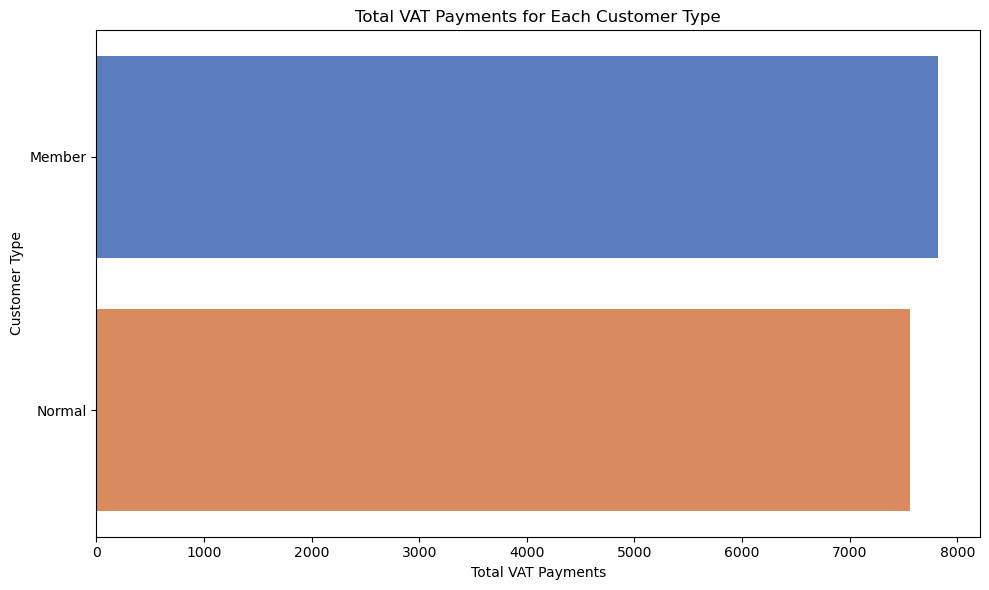

In [57]:
# Sort customer types by total VAT payments in descending order
customer_type_vat_sorted = customer_type_vat.sort_values(by='VAT', ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='VAT', y='customer_type', data=customer_type_vat_sorted, palette='muted')
plt.title('Total VAT Payments for Each Customer Type')
plt.xlabel('Total VAT Payments')
plt.ylabel('Customer Type')
plt.tight_layout()
plt.show()

#### Question19:What is the count of distinct customer types in the dataset?

In [58]:
# Count the distinct customer types
distinct_customer_types_count = ama_sale['customer_type'].nunique()

print("Count of distinct customer types in the dataset:", distinct_customer_types_count)

Count of distinct customer types in the dataset: 2


#### Visualization for Question19:

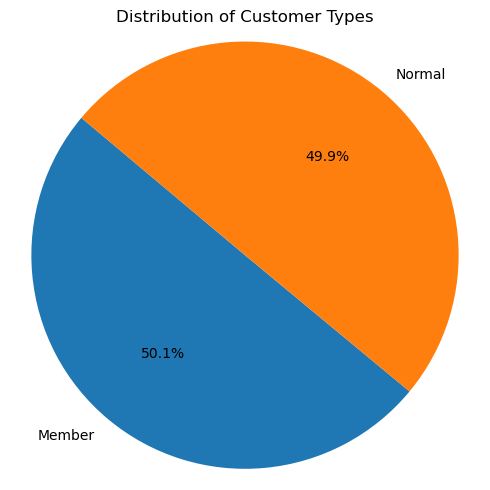

In [59]:
# Count the occurrences of each customer type
customer_type_counts = ama_sale['customer_type'].value_counts()

# Create labels for the pie chart
labels = ama_sale['customer_type'].unique()

# Create sizes for each slice of the pie chart
sizes = ama_sale['customer_type'].value_counts()

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Customer Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

#### Question20:What is the count of distinct payment methods in the dataset?

In [60]:

# Count the distinct payment methods
distinct_payment_methods_count = ama_sale['payment_method'].nunique()

print("Count of distinct payment methods in the dataset:", distinct_payment_methods_count)


Count of distinct payment methods in the dataset: 3


#### Visualization for Question20:

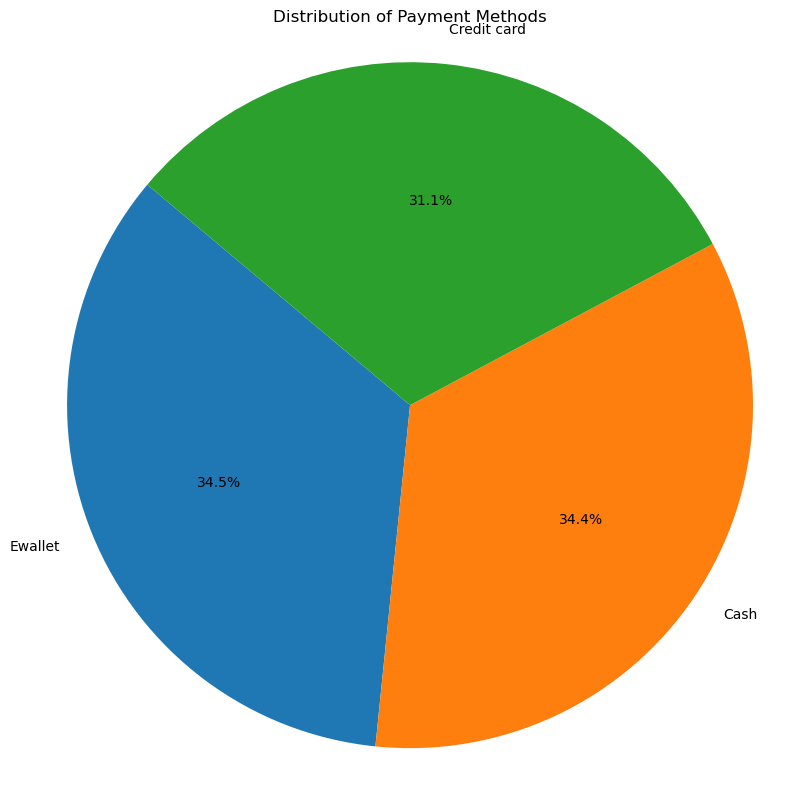

In [61]:

# Create labels for the pie chart
labels = ama_sale['payment_method'].unique()

# Create sizes for each slice of the pie chart
sizes = ama_sale['payment_method'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Payment Methods')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

#### Question21:Which customer type occurs most frequently?

In [62]:
# Count the occurrences of each customer type
customer_type_counts = ama_sale['customer_type'].value_counts()

# Find the customer type with the highest count
most_frequent_customer_type = customer_type_counts.idxmax()

print("Customer type that occurs most frequently:", most_frequent_customer_type)

Customer type that occurs most frequently: Member


#### Visualization for Question21:

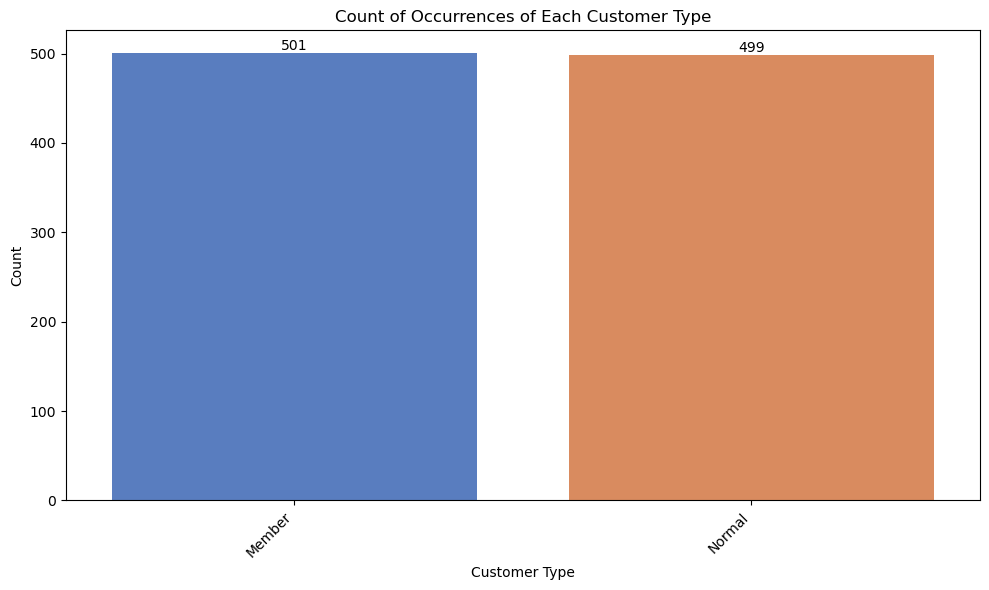

In [63]:

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=customer_type_counts.index, y=customer_type_counts.values, palette='muted')
plt.title('Count of Occurrences of Each Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()

# Add count annotations on the bars
for i, count in enumerate(customer_type_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

#### Question22:Identify the customer type with the highest purchase frequency.

In [64]:
# Group by 'customer_type' and count the number of purchases for each customer type
customer_type_purchase_frequency = ama_sale.groupby('customer_type').size()

# Find the customer type with the highest purchase frequency
highest_purchase_frequency_customer_type = customer_type_purchase_frequency.idxmax()

print("Customer type with the highest purchase frequency:", highest_purchase_frequency_customer_type)

Customer type with the highest purchase frequency: Member


#### Visualization for Question22:

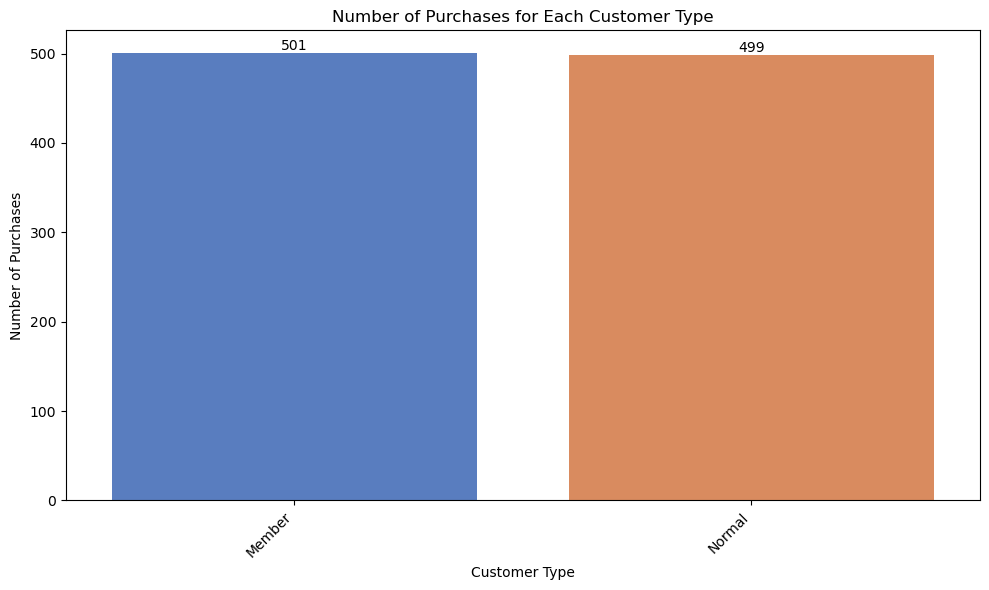

In [65]:
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=customer_type_purchase_frequency.index, y=customer_type_purchase_frequency.values, palette='muted')
plt.title('Number of Purchases for Each Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()

# Add count annotations on the bars
for i, count in enumerate(customer_type_purchase_frequency.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

#### Question23:Determine the predominant gender among customers

In [66]:

# Count the occurrences of each gender
gender_counts = ama_sale['gender'].value_counts()

# Find the gender with the highest count
predominant_gender = gender_counts.idxmax()

print("Predominant gender among customers:", predominant_gender)

Predominant gender among customers: Female


#### Visualization for Question23:

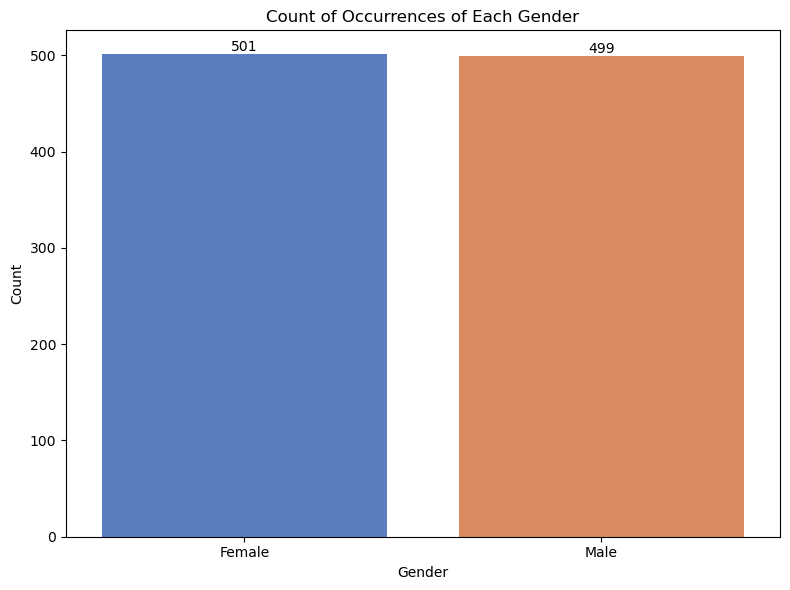

In [67]:
# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='muted')
plt.title('Count of Occurrences of Each Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()

# Add count annotations on the bars
for i, count in enumerate(gender_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

#### Question24:Examine the distribution of genders within each branch.

In [68]:
# Group by 'branch' and 'gender', count occurrences, and reset index
branch_gender_distribution = ama_sale.groupby(['branch', 'gender']).size().reset_index(name='count')

print("Distribution of genders within each branch:")
print(branch_gender_distribution)

Distribution of genders within each branch:
  branch  gender  count
0      A  Female    161
1      A    Male    179
2      B  Female    162
3      B    Male    170
4      C  Female    178
5      C    Male    150


#### Visualization for Question24:

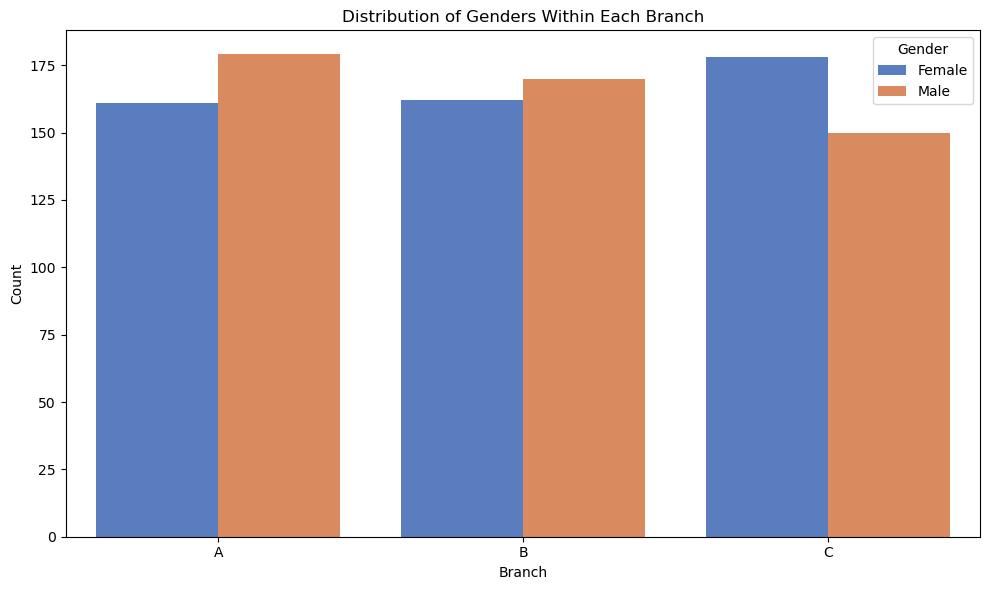

In [69]:

# Create a grouped bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='branch', y='count', hue='gender', data=branch_gender_distribution, palette='muted')
plt.title('Distribution of Genders Within Each Branch')
plt.xlabel('Branch')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

#### Question25:Identify the time of day when customers provide the most ratings.

In [70]:
# Group by 'timeofday' and sum the number of ratings provided during each time of day
ratings_by_timeofday = ama_sale.groupby('timeofday')['Rating'].count()

# Find the time of day with the most ratings
most_ratings_timeofday = ratings_by_timeofday.idxmax()

print("Time of day when customers provide the most ratings:", most_ratings_timeofday)

Time of day when customers provide the most ratings: Afternoon


#### Visualization for Question25:

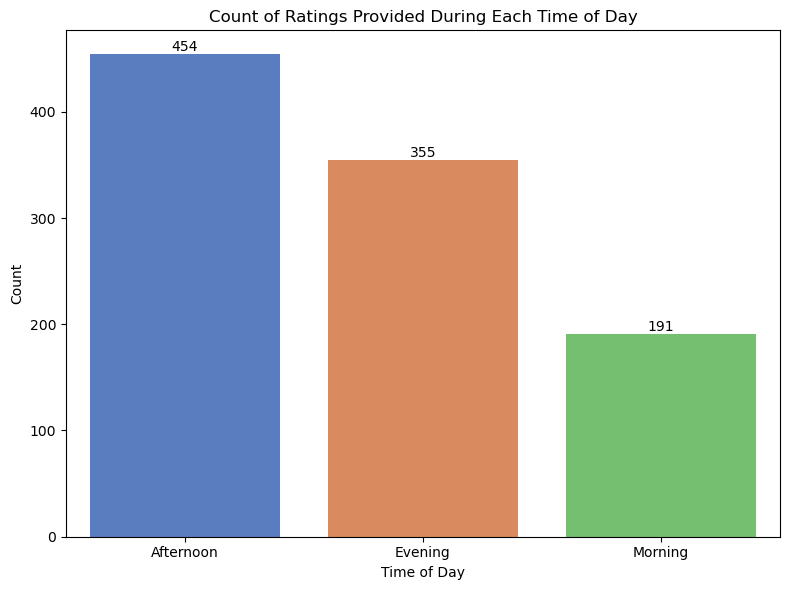

In [71]:

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=ratings_by_timeofday.index, y=ratings_by_timeofday.values, palette='muted')
plt.title('Count of Ratings Provided During Each Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Count')
plt.tight_layout()

# Add count annotations on the bars
for i, count in enumerate(ratings_by_timeofday.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

#### Question26:Determine the time of day with the highest customer ratings for each branch.

In [72]:
# Group by 'branch' and 'timeofday' and calculate the average rating within each group
ratings_by_branch_timeofday = ama_sale.groupby(['branch', 'timeofday'])['Rating'].mean().reset_index()

# Find the time of day with the highest customer ratings for each branch
highest_ratings_timeofday_per_branch = ratings_by_branch_timeofday.loc[ratings_by_branch_timeofday.groupby('branch')['Rating'].idxmax()]

print("Time of day with the highest customer ratings for each branch:")
print(highest_ratings_timeofday_per_branch)

Time of day with the highest customer ratings for each branch:
  branch  timeofday    Rating
0      A  Afternoon  7.093671
5      B    Morning  6.891525
7      C    Evening  7.113913


##### Visualization for Question26:

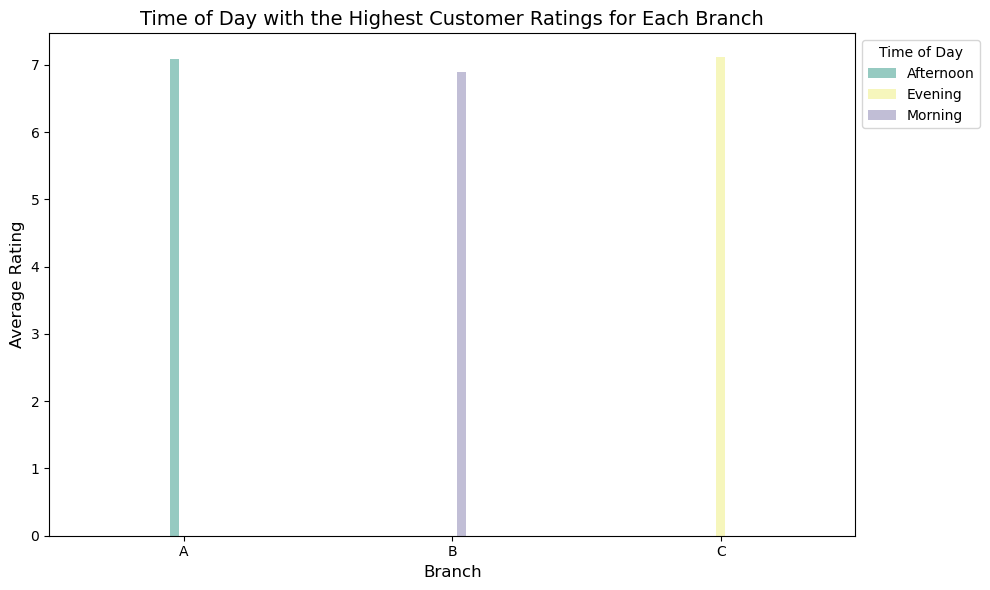

In [73]:
# Customize the plot size
plt.figure(figsize=(10, 6))

# Create the grouped bar plot with a small width to make bars touch
sns.barplot(
    x='branch', 
    y='Rating', 
    hue='timeofday', 
    data=highest_ratings_timeofday_per_branch, 
    palette="Set3",
    width=0.1  # Adjust the width as needed
)

# Add title, labels, and legend with adjustments
plt.title('Time of Day with the Highest Customer Ratings for Each Branch', fontsize=14)
plt.xlabel('Branch', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.legend(title='Time of Day', loc='upper left', bbox_to_anchor=(1, 1))  # Place legend outside the plot

# Control spacing and display the plot
plt.tight_layout()
plt.show()

#### Question27:Identify the day of the week with the highest average ratings.

In [74]:
# Group by 'dayname' and calculate the average rating for each day of the week
average_ratings_by_day = ama_sale.groupby('dayname')['Rating'].mean()

# Find the day of the week with the highest average ratings
highest_average_rating_day = average_ratings_by_day.idxmax()

print("Day of the week with the highest average ratings:", highest_average_rating_day)

Day of the week with the highest average ratings: Mon


#### Visualizations for Question27:

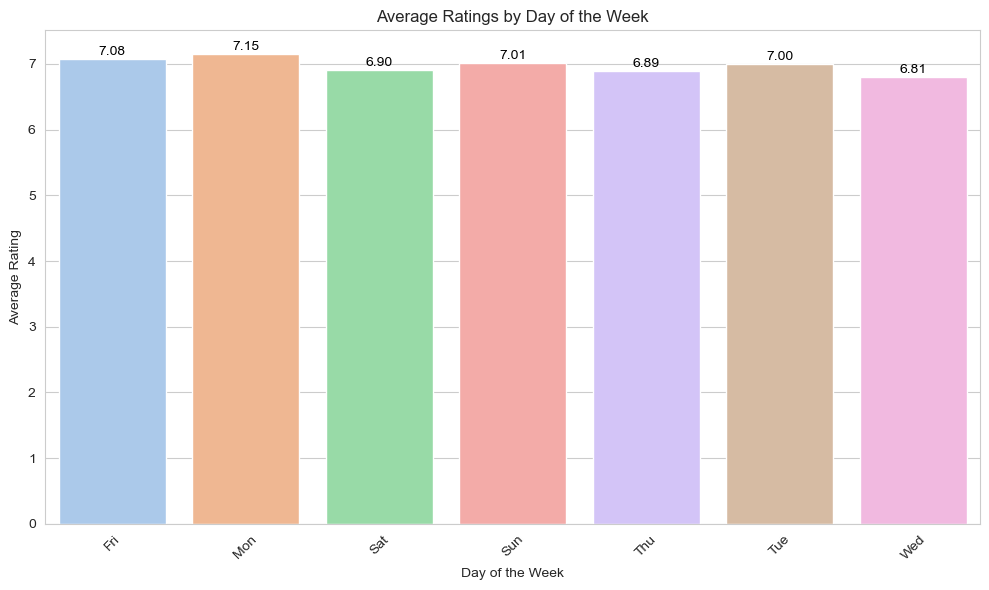

In [75]:
# Set seaborn style and palette
sns.set_style("whitegrid")
sns.set_palette("pastel")

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=average_ratings_by_day.index, y=average_ratings_by_day.values)

# Add labels and title
plt.title('Average Ratings by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Rating')

# Annotate bars with ratings
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show plot
plt.tight_layout()
plt.show()

#### Question28:Determine the day of the week with the highest average ratings for each branch.

In [76]:
# Group by 'branch' and 'dayname', and calculate the average rating within each group
average_ratings_by_branch_day = ama_sale.groupby(['branch', 'dayname'])['Rating'].mean().reset_index()

# Find the day of the week with the highest average ratings for each branch
highest_average_rating_day_per_branch = average_ratings_by_branch_day.loc[average_ratings_by_branch_day.groupby('branch')['Rating'].idxmax()]

print("Day of the week with the highest average ratings for each branch:")
print(highest_average_rating_day_per_branch)

Day of the week with the highest average ratings for each branch:
   branch dayname    Rating
0       A     Fri  7.312000
8       B     Mon  7.335897
14      C     Fri  7.278947


#### Visualization for Question28:

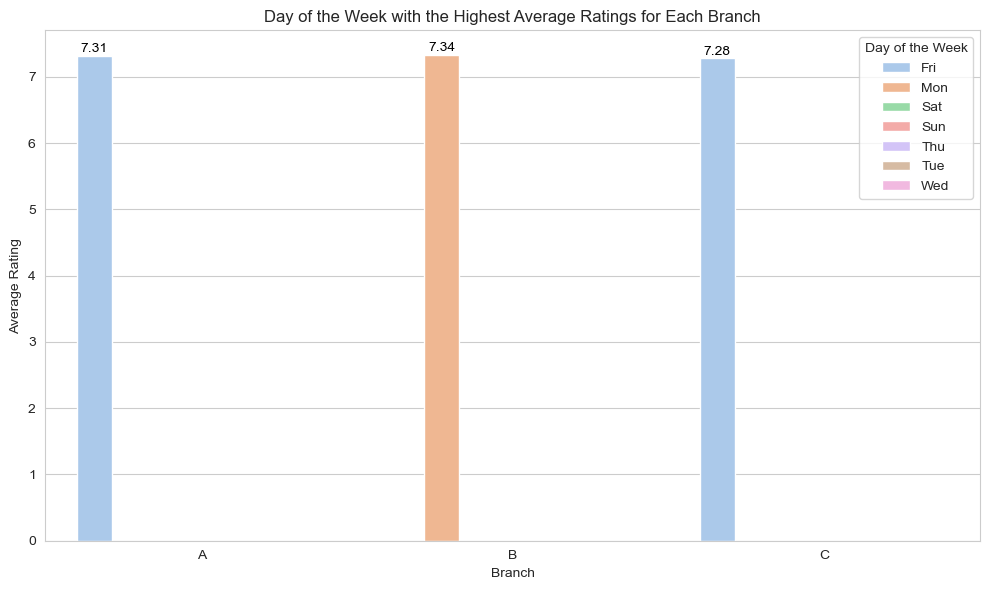

In [77]:
# Set seaborn style and palette
sns.set_style("whitegrid")
sns.set_palette("pastel")

# Define the order of branches
branch_order = sorted(highest_average_rating_day_per_branch['branch'].unique())

# Create a grouped bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='branch', y='Rating', hue='dayname', data=highest_average_rating_day_per_branch, order=branch_order)

# Add labels and title
plt.title('Day of the Week with the Highest Average Ratings for Each Branch')
plt.xlabel('Branch')
plt.ylabel('Average Rating')

# Add legend
plt.legend(title='Day of the Week')

# Annotate bars with ratings
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Show plot
plt.tight_layout()
plt.show()